## Machine Learning Assignment 1
### Murtaza Hussain (29449) and Muhammad Asad ur Rehman (29456)
UCI-ML Dataset Link: https://archive.ics.uci.edu/dataset/73/mushroom

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from lazypredict.Supervised import LazyClassifier

In [2]:
# Data Loader loads data from UCI-ML Repo
def load_dataset():
    # fetch dataset
    mushroom = fetch_ucirepo(id=73) 

    # data (as pandas dataframes) 
    x = mushroom.data.features 
    y = mushroom.data.targets 
    z = mushroom.data.original

    # metadata 
    print(mushroom.metadata) 

    # variable information 
    print(mushroom.variables)

    return x, y, z

# UCI-ML Repo Provides us with 3 Pandas DF inherently:
# 1. features (contains only the features)
# 2. targets (the targets to be preddicted)
# 3. original (contains both features and targets)
features, targets, original = load_dataset()

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(original)

Column Name: cap-shape
Column DataType: object
Column unique values: ['x' 'b' 's' 'f' 'k' 'c']
Column has null: False


Column Name: cap-surface
Column DataType: object
Column unique values: ['s' 'y' 'f' 'g']
Column has null: False


Column Name: cap-color
Column DataType: object
Column unique values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Column has null: False


Column Name: bruises
Column DataType: object
Column unique values: ['t' 'f']
Column has null: False


Column Name: odor
Column DataType: object
Column unique values: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Column has null: False


Column Name: gill-attachment
Column DataType: object
Column unique values: ['f' 'a']
Column has null: False


Column Name: gill-spacing
Column DataType: object
Column unique values: ['c' 'w']
Column has null: False


Column Name: gill-size
Column DataType: object
Column unique values: ['n' 'b']
Column has null: False


Column Name: gill-color
Column DataType: object
Column unique values: ['k' 'n' '

In [4]:
# This function drops any null columns and missing values
# This is where you decide whether to remove NULL rows (which will reduce the size of Dataset) or remove NULL columns entirely. You can also choose a combination of both.
def clean_data(df, drop_columns, missing_value):
    # Remove unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)
    # Drop rows with any missing values
    if missing_value == False:
        df.dropna(inplace=True)
    else:
        df.fillna(missing_value, inplace=True)
    return df

clean_data(original,[],False)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


In [5]:
# Transforms categorical and numberical data into numerical data
def transform_data(df):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Standardize numerical features
    scaler = StandardScaler()
    print("Numerical columns:", df.select_dtypes(include=['float64', 'int64']).columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

transform_data(original)

Categorical columns: Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')
Numerical columns: Index([], dtype='object')


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,2,0,...,5,5,0,0,1,3,1,3,5,1
1,5,2,7,1,0,1,0,0,2,0,...,5,5,0,0,1,3,2,2,1,0
2,0,2,6,1,3,1,0,0,3,0,...,5,5,0,0,1,3,2,2,3,0
3,5,3,6,1,6,1,0,1,3,0,...,5,5,0,0,1,3,1,3,5,1
4,5,2,3,0,5,1,1,0,2,1,...,5,5,0,0,1,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,3,4,0,5,1,0,0,7,0,...,3,3,0,0,2,3,5,5,4,0
8001,5,3,4,0,5,1,0,0,7,0,...,3,3,0,0,2,3,5,5,4,0
8038,5,3,3,1,5,1,0,0,7,0,...,5,5,0,0,2,3,5,5,4,0
8095,5,3,1,0,4,1,0,0,8,0,...,1,1,0,0,0,2,5,1,0,1


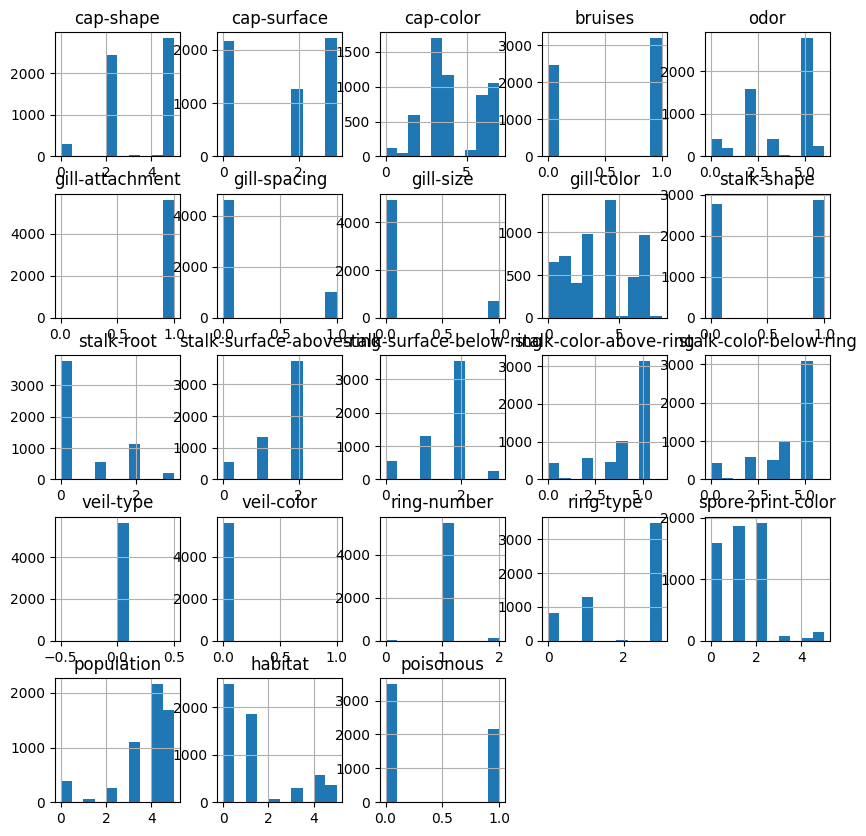

In [6]:
# Creates histograms for categorical data
def plot_histograms(df):
    df.hist(figsize=(10, 10))
    plt.show()

# Creates boxplot for numerical data
def plot_boxplots(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=df[col])
        plt.show()

plot_histograms(original)

In [7]:
def generate_summary_statistics(original):
    """
    Generate summary statistics for a given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: Summary statistics DataFrame.
    """
    # Compute mean
    mean = original.mean()

    # Compute mode
    mode = original.mode().iloc[0]  # Mode may have multiple values, so we take the first one

    # Compute median
    median = original.median()

    # Compute quartiles
    quartiles = original.quantile([0.25, 0.5, 0.75])

    # Compute minimum and maximum
    minimum = original.min()
    maximum = original.max()

    # Combine the results into a DataFrame for easier visualization
    summary_df = pd.DataFrame({
        'Mean': mean,
        'Mode': mode,
        'Median': median,
        'Q1': quartiles.loc[0.25],
        'Q2': quartiles.loc[0.5],
        'Q3': quartiles.loc[0.75],
        'Minimum': minimum,
        'Maximum': maximum
    })

    return summary_df

In [8]:
# Runs KNNClassifier on default settings
def knn_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    knn_model = KNeighborsClassifier()
    
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))

In [9]:
# Runs KNN CV on default settings
def knn_cv(df, target_name, cv=5):

    # Separate features and targets
    X = df.drop(target_name, axis=1)
    y = df[target_name]

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier()
    
    # Initialize k-fold cross-validation
    k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform cross-validation and compute scores
    scores = cross_val_score(knn_classifier, X, y, cv=k_fold, scoring='accuracy')
    
    # Calculate and print the mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)

In [10]:
def lazy_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Initialize Lazy Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

    # Generate predictions and evaluate performance
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    print("Mean Accuracy of the Dataset: ", models['Accuracy'].mean())
    print("Standard Deviation of Accuracy of the Dataset: ", models['Accuracy'].std())
    
    return models

model = lazy_classifier(original, targets.columns[0])

 24%|██▍       | 7/29 [00:01<00:03,  5.73it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 93%|█████████▎| 27/29 [00:11<00:00,  4.14it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:11<00:00,  4.24it/s]

[LightGBM] [Info] Number of positive: 1725, number of negative: 2790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 4515, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382060 -> initscore=-0.480815
[LightGBM] [Info] Start training from score -0.480815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 29/29 [00:12<00:00,  2.41it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mean Accuracy of the Dataset:  0.9516123741101598
Standard Deviation of Accuracy of the Dataset:  0.10043952558041092


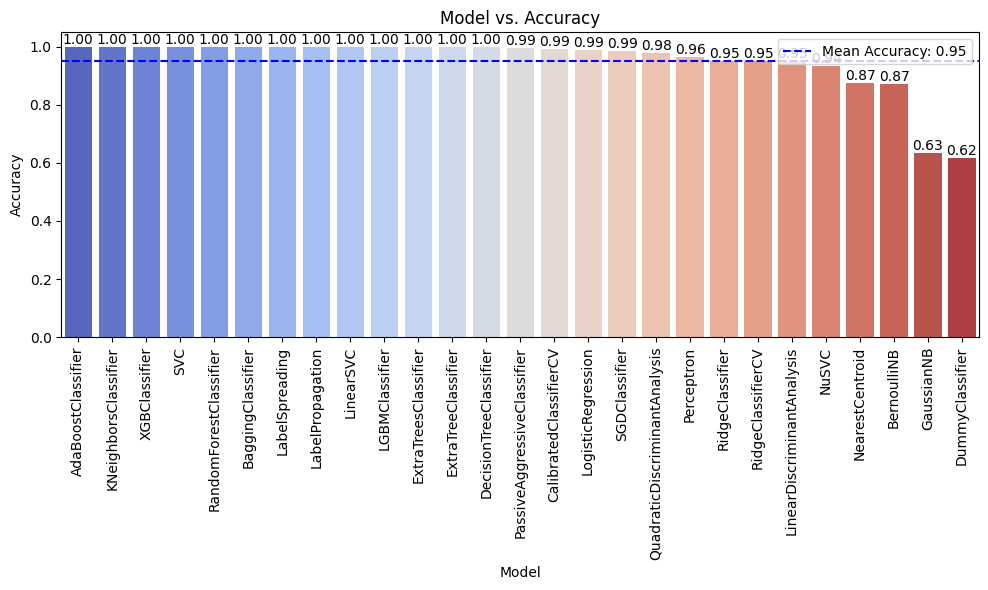

In [11]:
# Plot a model vs Accuracy graph for Lazy Predict
def plot_model_accuracy_graph(df):
    mean_accuracy = df['Accuracy'].mean()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
    plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.title('Model vs. Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.legend()

    for i in range(len(df)):
        plt.text(i, df['Accuracy'][i], f"{df['Accuracy'][i]:.2f}", ha = 'center', va = 'bottom')

    plt.tight_layout()
    plt.show()

plot_model_accuracy_graph(model)

In [12]:
# Master Workflow, combines and manages all the workflow from one place
# Specifically Tailored for Mushroom Dataset
def master_workflow():
    features, targets, original = load_dataset()
    null_cols = null_check(original)
    original = clean_data(original,[],False)
    original = transform_data(original)
    plot_histograms(original)
    plot_boxplots(original)
    summary_statistics = generate_summary_statistics(original)
    print(summary_statistics)
    print("KNN Classifier:")
    knn_classifier(original, targets.columns[0])
    print("Cross-Validation with KNN Classifier:")
    knn_cv(original, targets.columns[0])
    print("Lazy Predict for different models:")
    model = lazy_classifier(original, targets.columns[0])
    plot_model_accuracy_graph(model)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

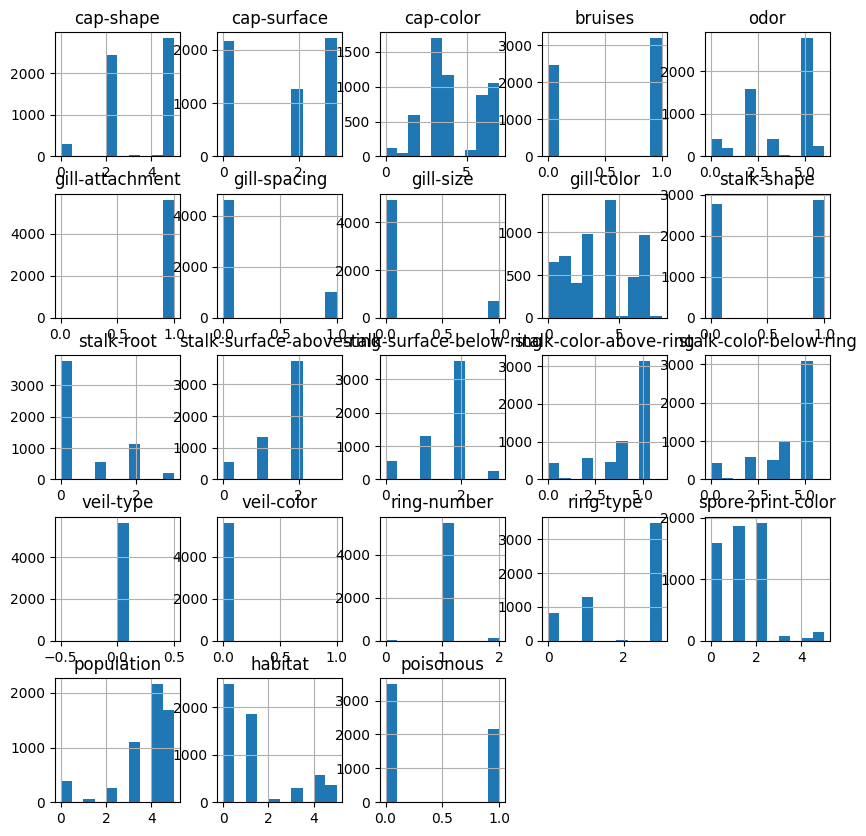

                          Mean  Mode  Median   Q1   Q2   Q3  Minimum  Maximum
cap-shape                 3.42     5    5.00 2.00 5.00 5.00        0        5
cap-surface               1.63     3    2.00 0.00 2.00 3.00        0        3
cap-color                 4.27     3    4.00 3.00 4.00 6.00        0        7
bruises                   0.56     1    1.00 0.00 1.00 1.00        0        1
odor                      3.56     5    5.00 2.00 5.00 5.00        0        6
gill-attachment           1.00     1    1.00 1.00 1.00 1.00        0        1
gill-spacing              0.18     0    0.00 0.00 0.00 0.00        0        1
gill-size                 0.12     0    0.00 0.00 0.00 0.00        0        1
gill-color                3.54     4    4.00 2.00 4.00 6.00        0        8
stalk-shape               0.51     1    1.00 0.00 1.00 1.00        0        1
stalk-root                0.60     0    0.00 0.00 0.00 1.00        0        3
stalk-surface-above-ring  1.57     2    2.00 1.00 2.00 2.00     

 28%|██▊       | 8/29 [00:01<00:02,  8.27it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|█████████▋| 28/29 [00:08<00:00,  5.13it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 1725, number of negative: 2790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 4515, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382060 -> initscore=-0.480815
[LightGBM] [Info] Start training from score -0.480815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

100%|██████████| 29/29 [00:08<00:00,  3.29it/s]


Mean Accuracy of the Dataset:  0.9516123741101598
Standard Deviation of Accuracy of the Dataset:  0.10043952558041092


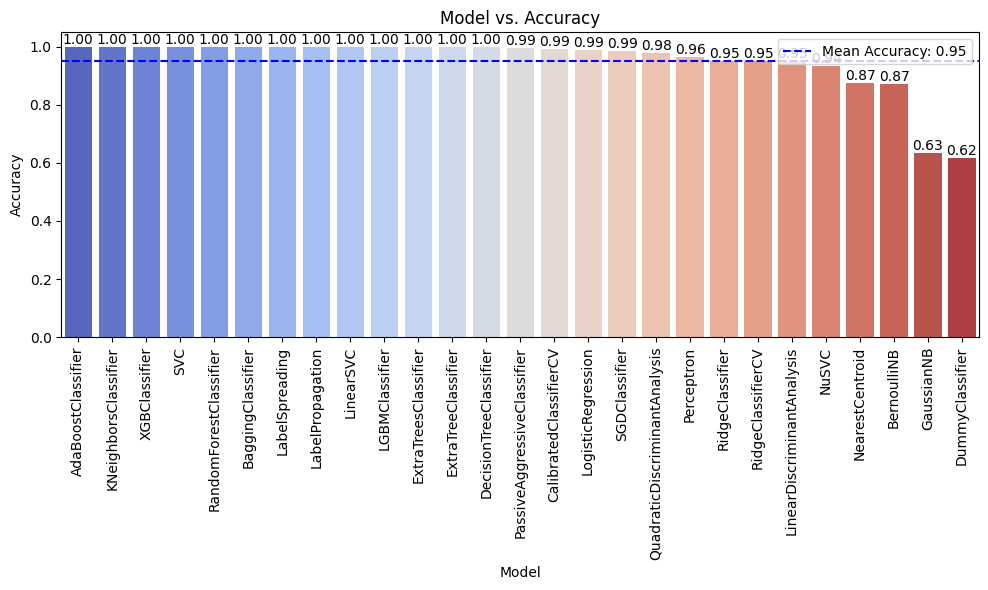

In [13]:
master_workflow()

### EDA Interpretation

Interpretation of EDA:
- Analysis of feature distributions and relationships showed that the feature named stalk-root has Null values
- For stalk-root feature, we tested removing the feature. Prediction accuracy decreased.
- For stalk-root feature, we tested removing the Null values. Prediction accuracy improved.
- There were no significant outliers detected in the dataset.


### ML Results Interpretation

Interpretation of ML Results:
- KNN was applied to the dataset, the accuracy of the model was 0.999.
- KNN with cross-validation was also applied to the dataset, the mean accuracy was 0.999 with a standard deviation of 0.000
- Additionally we also applied Lazy Predict on the dataset, the mean accuracy of the models was 0.952 with a standard deviation of 0.100
- The model performance suggests that the model has a data with related features and does not contain any outliers hence the high accuracy of the models.
- All the features were categorical, which is a big factor in high accuracy.